## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np
from scipy.stats import linregress 
import seaborn as sns  
sns.set()
# Study data files
mouse_metadata = r"C:\Users\javyc\Downloads\Homework_05-Matplotlib_Pymaceuticals_data_Mouse_metadata (1).csv"
study_results = r"C:\Users\javyc\Downloads\Homework_05-Matplotlib_Pymaceuticals_data_Study_results (1).csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset 
combined_data = pd.merge(mouse_metadata, study_results, how = 'outer') 
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
drug_reg = combined_data.groupby('Drug Regimen')
tumor_volumes = drug_reg['Tumor Volume (mm3)'] 
mean_tumor = tumor_volumes.mean()
median_tumor = tumor_volumes.median() 
variance_tumor = tumor_volumes.var() 
stdev_tumor = tumor_volumes.std() 
sem_tumor = tumor_volumes.sem()
grouped_drug_regimens = drug_reg.mean()

columns = {"Tumor volume mean" : mean_tumor, 'Tumor volume median' : median_tumor, 'Tumor volume variance' : variance_tumor, 
                                    'Tumor standard deviation': stdev_tumor, 'Tumor volume SEM': sem_tumor} 
grouped_drug_regimens = pd.DataFrame(data = columns, dtype= float)
grouped_drug_regimens 

,Tumor volume mean,Tumor volume median,Tumor volume variance,Tumor standard deviation,Tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

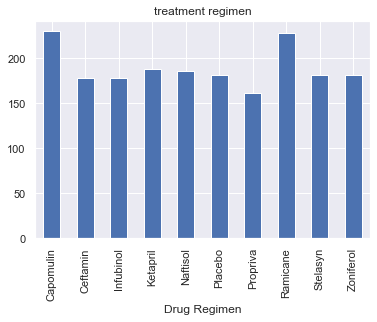

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas 
count_of_drugs=combined_data.groupby('Drug Regimen')['Drug Regimen'].count()
count_of_drugs.plot(kind = 'bar', title = 'treatment regimen')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

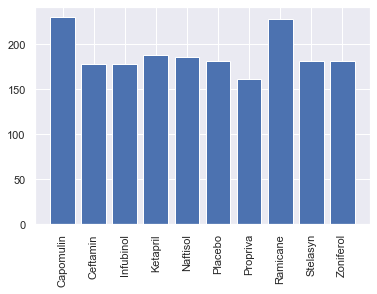

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
plt.bar(count_of_drugs.index,count_of_drugs.values) 
plt.xticks(rotation='vertical')

In [5]:
# drop null values
combined_data.dropna()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Pie plots

Male      958
Female    935
Name: Sex, dtype: int64

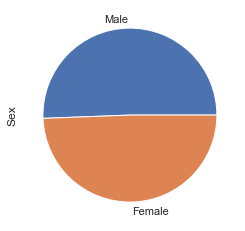

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas 
gender_of_mice = combined_data['Sex'].value_counts() 
gender_of_mice.plot(kind = 'pie')
gender_of_mice

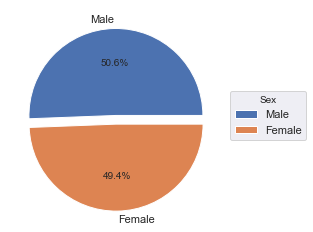

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot 
labels = ['Male','Female'] 
explode = (0,0.1)

plt.pie(gender_of_mice,labels = labels, autopct='%1.1f%%', explode=explode) 
plt.legend(labels, title="Sex",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#use grouped_drug_regimens and sort by values to get the top 4 drug regimens
#new dataframe that only includes top 4 drug regimens
grouped_drug_regimens = grouped_drug_regimens.sort_values(by = ['Tumor volume SEM']) 

four_promising_treatment = grouped_drug_regimens.nsmallest(4,'Tumor volume variance') 

print(four_promising_treatment)

              Tumor volume mean  Tumor volume median  Tumor volume variance  \
Drug Regimen                                                                  
Ramicane              40.216745            40.673236              23.486704   
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Propriva              52.322552            50.854632              42.351070   

              Tumor standard deviation  Tumor volume SEM  
Drug Regimen                                              
Ramicane                      4.846308          0.320955  
Capomulin                     4.994774          0.329346  
Ceftamin                      6.268188          0.469821  
Propriva                      6.507770          0.512884  


In [9]:
top_four_drug_regs = four_promising_treatment.index
print(top_four_drug_regs)
druglist = ['Ramicane', 'Capomulin', 'Ceftamin', 'Propriva']
four_drugs=combined_data.loc[combined_data['Drug Regimen'].isin(druglist)]
four_drugs

successful_treatment=four_drugs.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].min()
successful_treatment

Index(['Ramicane', 'Capomulin', 'Ceftamin', 'Propriva'], dtype='object', name='Drug Regimen')


Drug Regimen
Capomulin    23.343598
Ceftamin     45.000000
Propriva     45.000000
Ramicane     22.050126
Name: Tumor Volume (mm3), dtype: float64

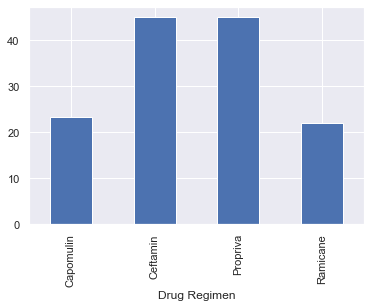

In [10]:
successful_treatment.plot(kind='bar')

In [11]:
four_drugs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1854,y865,Ceftamin,Male,23,26,40,63.469549,3
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1860,z435,Propriva,Female,12,26,0,45.000000,0
1861,z435,Propriva,Female,12,26,5,47.115980,0


In [12]:
successful_treatment=successful_treatment.reset_index()
successful_treatment

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,23.343598
1,Ceftamin,45.000000
2,Propriva,45.000000
3,Ramicane,22.050126


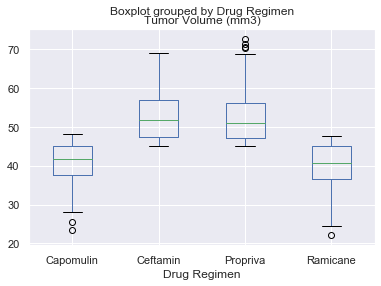

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 
four_drugs.boxplot(column='Tumor Volume (mm3)',by='Drug Regimen')

## Line and scatter plots

In [14]:
capo=four_drugs.loc[four_drugs['Drug Regimen']== 'Capomulin'] 
capo.iloc[30] 
only_capo = capo.loc[capo['Mouse ID']== 'j246'] 

only_capo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
310,j246,Capomulin,Female,21,21,0,45.000000,0
311,j246,Capomulin,Female,21,21,5,45.641438,0
312,j246,Capomulin,Female,21,21,10,46.408361,0
313,j246,Capomulin,Female,21,21,15,43.312654,0
314,j246,Capomulin,Female,21,21,20,44.020370,0
315,j246,Capomulin,Female,21,21,25,44.555226,0
316,j246,Capomulin,Female,21,21,30,38.044082,1
317,j246,Capomulin,Female,21,21,35,38.753265,1


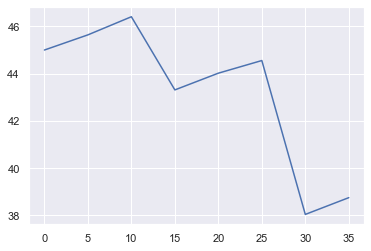

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin 
plt.plot(only_capo['Timepoint'],only_capo['Tumor Volume (mm3)']) 


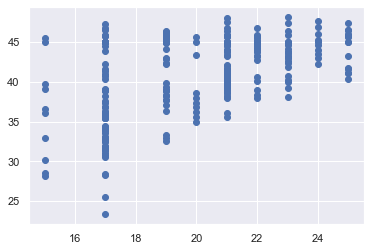

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen 
#mouse_weight = combined_data.groupby(['Weight (g)']) 
mouse_weight = capo['Weight (g)'] 
average_tumor_volume_for_Capomulin_regimen = capo['Tumor Volume (mm3)'] 
mouse_weight_avg_tumor_volume_for_capoulim_regimen = plt.scatter(x = mouse_weight, y = average_tumor_volume_for_Capomulin_regimen) 

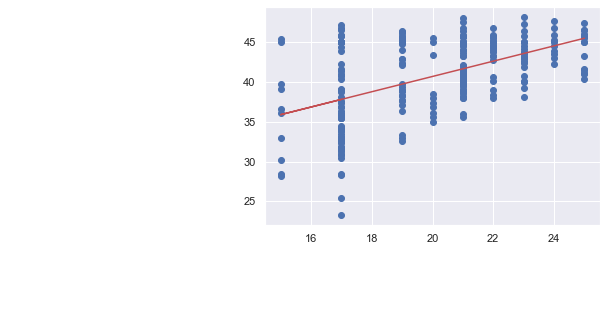

None
0.53


In [17]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 
correlation = st.pearsonr(mouse_weight,average_tumor_volume_for_Capomulin_regimen) 
correlation_of_mouse_weight_and_average_tumor_volume_for_Capomulin_regimen = round(correlation[0],2) 
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, average_tumor_volume_for_Capomulin_regimen) 
regress_values =  mouse_weight* slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) 
plt.scatter(mouse_weight,average_tumor_volume_for_Capomulin_regimen)
plt.plot(mouse_weight,regress_values,"r-") 
plt.annotate(line_eq,(6,10),fontsize=15,color="red") 
print(plt.show()) 